# Uczenie maszynowe
## Lista 3: Indukcja drzew decyzyjnych za pomocą C4.5 (C5.0)

**Autor:** Patryk Rygiel (250080)  
**GitHub:** https://github.com/PatRyg99/ML-PWR-2022

In [1]:
library(RWeka)
library(caret)

Loading required package: ggplot2

Loading required package: lattice



# IRIS

## 1. Ładowanie zbioru danych

In [44]:
irisData <- read.csv("zbiory/iris.data", header=FALSE)
colnames(irisData) <- c("sepal.length", "sepal.width", "petal.length", "petal.width", "class")

head(irisData)

,sepal.length,sepal.width,petal.length,petal.width,class
,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa


## 2. Analiza algorytmu C4.5

### 2.1 Uruchomienie dla domyślnych parametrów

In [45]:
trainRowNumbers <- createDataPartition(irisData$class, p = 0.7, list = FALSE)

trainData <- irisData[trainRowNumbers, ]
testData <- irisData[-trainRowNumbers, ]

In [46]:
fit.C45 <- J48(class~., data=trainData)
predictions <- predict(fit.C45, testData)

confusionMatrix(predictions, testData$class)

Confusion Matrix and Statistics

                 Reference
Prediction        Iris-setosa Iris-versicolor Iris-virginica
  Iris-setosa              14               0              0
  Iris-versicolor           1              12              0
  Iris-virginica            0               3             15

Overall Statistics
                                          
               Accuracy : 0.9111          
                 95% CI : (0.7878, 0.9752)
    No Information Rate : 0.3333          
    P-Value [Acc > NIR] : 8.467e-16       
                                          
                  Kappa : 0.8667          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: Iris-setosa Class: Iris-versicolor
Sensitivity                      0.9333                 0.8000
Specificity                      1.0000                 0.9667
Pos Pred Value                   1.0000                 0.9231
Neg Pred Value

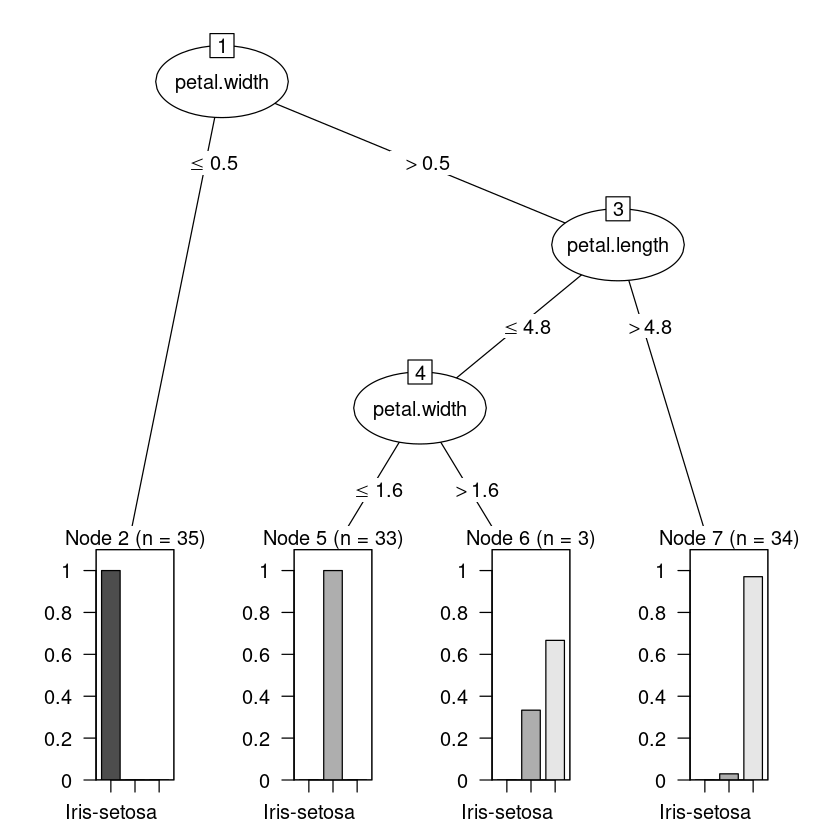

In [47]:
plot(fit.C45)

Klasyfikacja przy użyciu metody C4.5 osiąga całkiem dobre rezultaty dla zbioru Iris: accuracy ~ 95%. Analizując wyrysowane drzewo, możemy zauważyć, że klasyfikacja odbywa się tylko na podstawie dwóch cech (petal-width oraz petal-length), cechy sepal nie są w ogólne brane pod uwagę.

## 2.2 Strojenie parametrów

Parametry do strojenia dla C4.5:
* *confidence factor* - 
* *minimum number of instances* -
* *pruning* - 

In [99]:
J48

An R interface to Weka class 'weka.classifiers.trees.J48', which has
information

  Class for generating a pruned or unpruned C4.5 decision tree. For
  more information, see

  Ross Quinlan (1993). C4.5: Programs for Machine Learning. Morgan
  Kaufmann Publishers, San Mateo, CA.

  BibTeX:

  @BOOK{Quinlan1993,
    title = {C4.5: Programs for Machine Learning},
    address = {San Mateo, CA},
    year = {1993},
    publisher = {Morgan Kaufmann Publishers},
    author = {Ross Quinlan},
  }

Argument list:
  (formula, data, subset, na.action, control = Weka_control(), 
    options = NULL) 

Returns objects inheriting from classes:
  J48 Weka_tree Weka_classifier

In [106]:
cvIndex <- createFolds(irisData$class, 10, returnTrain = T)
tune.grid <- expand.grid(
    .C = c(0.01, 0.025, 0.05, 0.1, 0.25, 0.5),
    .M = c(1, 2, 3, 4, 5, 6)
)

fit.kfolds.C45 <- train(
    class~., 
    data = irisData, 
    method = "J48",  
    tuneGrid = tune.grid, 
    trControl = trainControl(
        index = cvIndex,
        method = "repeatedcv",
        repeats = 5
    )
)

In [105]:
fit.kfolds.C45

C4.5-like Trees 

150 samples
  4 predictor
  3 classes: 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 5 times) 
Summary of sample sizes: 135, 135, 135, 135, 135, 135, ... 
Resampling results across tuning parameters:

  C      M  Accuracy   Kappa
  0.010  1  0.9266667  0.89 
  0.010  2  0.9333333  0.90 
  0.010  3  0.9333333  0.90 
  0.010  4  0.9333333  0.90 
  0.010  5  0.9333333  0.90 
  0.010  6  0.9333333  0.90 
  0.025  1  0.9266667  0.89 
  0.025  2  0.9333333  0.90 
  0.025  3  0.9333333  0.90 
  0.025  4  0.9333333  0.90 
  0.025  5  0.9333333  0.90 
  0.025  6  0.9333333  0.90 
  0.050  1  0.9266667  0.89 
  0.050  2  0.9333333  0.90 
  0.050  3  0.9333333  0.90 
  0.050  4  0.9333333  0.90 
  0.050  5  0.9333333  0.90 
  0.050  6  0.9333333  0.90 
  0.100  1  0.9333333  0.90 
  0.100  2  0.9400000  0.91 
  0.100  3  0.9400000  0.91 
  0.100  4  0.9400000  0.91 
  0.100  5  0.9400000  0.91 
  0.100  6  0

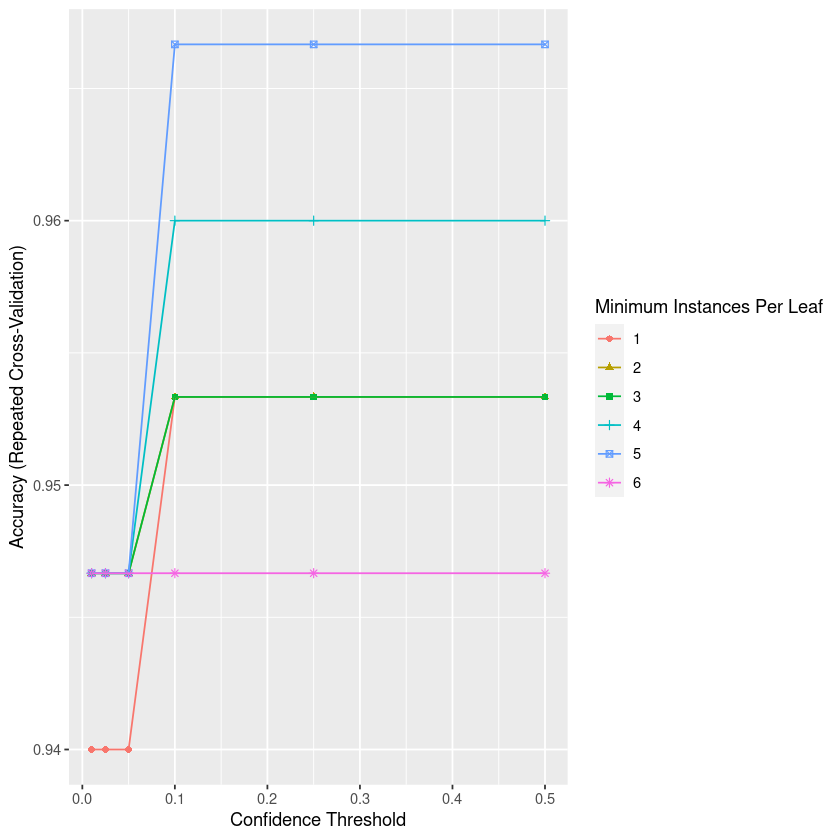

In [96]:
ggplot(fit.kfolds.C45)

# WINE

## 1. Ładowanie zbioru danych

In [34]:
wineData <- read.csv("zbiory/wine.data", header = FALSE)
colnames(wineData) <- c(
    "class", "Alcohol", "Malic.acid", "Ash", "Alcanity.of.ash", "Magnesium", 
    "Total.phenols", "Flavanoids", "Nonflavanoid.phenosis", "Proanthocyanins",
    "Color.intensity", "Hue", "OD280/OD315.of.diluted wine", "Proline"
)

wineData$class=factor(wineData$class)
head(wineData)

,class,Alcohol,Malic acid,Ash,Alcanity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenosis,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wine,Proline
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
2,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
3,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
4,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
5,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
6,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450


## 2. Analiza algorytmu C4.5

### 2.1 Uruchomienie dla domyślnych parametrów

In [42]:
trainRowNumbers <- createDataPartition(wineData$class, p = 0.7, list = FALSE)

trainData <- wineData[trainRowNumbers, ]
testData <- wineData[-trainRowNumbers, ]

In [44]:
fit.C45 <- J48(class~., data=trainData)
predictions <- predict(fit.C45, testData)

confusionMatrix(predictions, testData$class)

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3
         1 17  0  0
         2  0 20  5
         3  0  1  9

Overall Statistics
                                          
               Accuracy : 0.8846          
                 95% CI : (0.7656, 0.9565)
    No Information Rate : 0.4038          
    P-Value [Acc > NIR] : 7.681e-13       
                                          
                  Kappa : 0.8217          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3
Sensitivity            1.0000   0.9524   0.6429
Specificity            1.0000   0.8387   0.9737
Pos Pred Value         1.0000   0.8000   0.9000
Neg Pred Value         1.0000   0.9630   0.8810
Prevalence             0.3269   0.4038   0.2692
Detection Rate         0.3269   0.3846   0.1731
Detection Prevalence   0.3269   0.4808   0.1923
Balanced Accuracy      1.0000   0.8955   0.8083

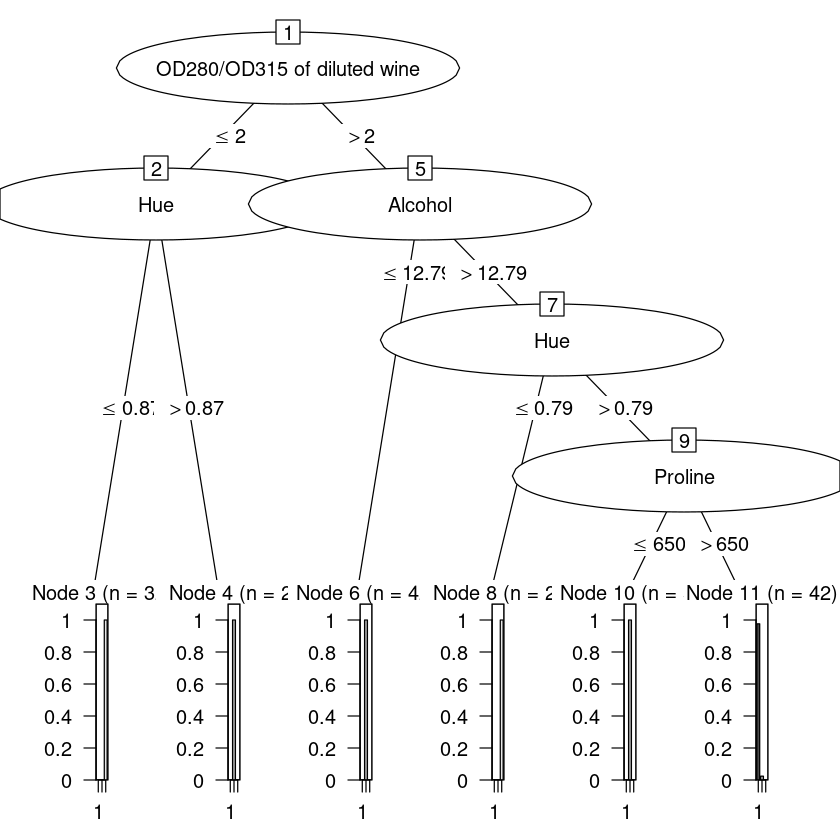

In [45]:
plot(fit.C45)

# GLASS

## 1. Ładowanie zbioru danych

In [46]:
glassData <- read.csv("zbiory/glass.data")
colnames(glassData) <- c("index", "RI", "Na", "Mg", "Al", "Si", "K", "Ca", "Ba", "Fe", "class")
glassData <- subset(glassData, select = -c(index))

glassData$class=factor(glassData$class)
head(glass_data)

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,class
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0,0.00,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0.00,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0,0.00,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0,0.00,1
5,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0,0.26,1
6,1.51743,13.30,3.60,1.14,73.09,0.58,8.17,0,0.00,1


## 2. Analiza algorytmu C4.5

### 2.1 Uruchomienie dla domyślnych parametrów

In [47]:
trainRowNumbers <- createDataPartition(glassData$class, p = 0.7, list = FALSE)

trainData <- glassData[trainRowNumbers, ]
testData <- glassData[-trainRowNumbers, ]

In [48]:
fit.C45 <- J48(class~., data=trainData)
predictions <- predict(fit.C45, testData)

confusionMatrix(predictions, testData$class)

Confusion Matrix and Statistics

          Reference
Prediction  1  2  3  5  6  7
         1 11  2  1  0  0  1
         2  9 13  0  0  1  1
         3  0  2  4  0  0  0
         5  0  2  0  2  0  1
         6  0  2  0  0  1  0
         7  0  1  0  1  0  5

Overall Statistics
                                          
               Accuracy : 0.6             
                 95% CI : (0.4654, 0.7244)
    No Information Rate : 0.3667          
    P-Value [Acc > NIR] : 0.000202        
                                          
                  Kappa : 0.4597          
                                          
 Mcnemar's Test P-Value : NA              

Statistics by Class:

                     Class: 1 Class: 2 Class: 3 Class: 5 Class: 6 Class: 7
Sensitivity            0.5500   0.5909  0.80000  0.66667  0.50000  0.62500
Specificity            0.9000   0.7105  0.96364  0.94737  0.96552  0.96154
Pos Pred Value         0.7333   0.5417  0.66667  0.40000  0.33333  0.71429
Neg Pred Value

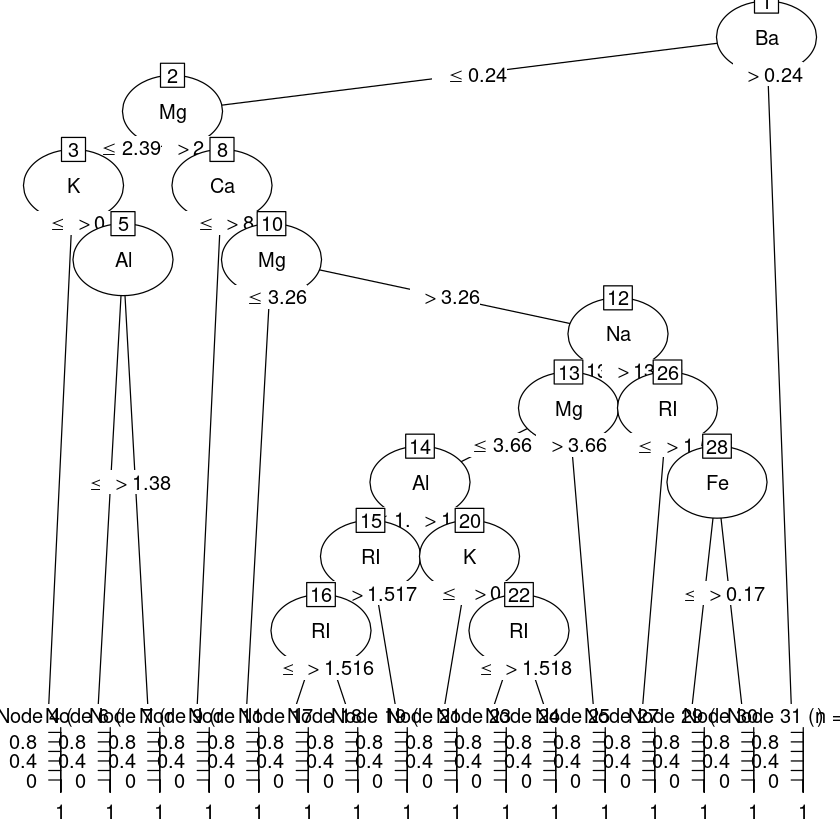

In [49]:
plot(fit.C45)

# Pytania

### 1. Co jest modelem klasyfikacji w C4.5 (C5.0)?

Odp: 

### 2. Co znajduje się w liściach drzewa?

Odp:

### 3. Czy przycinanie drzewa (*pruning*) jest potrzebne?

Odp:

### 4. Czy drzewo może być za "duże" lub za "małe"?

Odp:

### 5. Dlaczego typ/rozmiar walidacji krzyżowej może mieć duży wpływ na skuteczność modelu?

Odp:

### 6. Czy C4.5 (C5.0) potrzebuje normalizacji / standaryzacji / dyskretyzacji danych?

Odp:

### 7. Czy model można przeuczyć?

Odp:

### 8. Na podstawie działania C4.5 (C5.0), wyników i dokumentacji R (parametrów) - na czym polega przewaga C5.0?

Odp: